# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-02-27 20:34:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  36.7MB/s    in 1.0s    

2024-02-27 20:34:30 (36.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


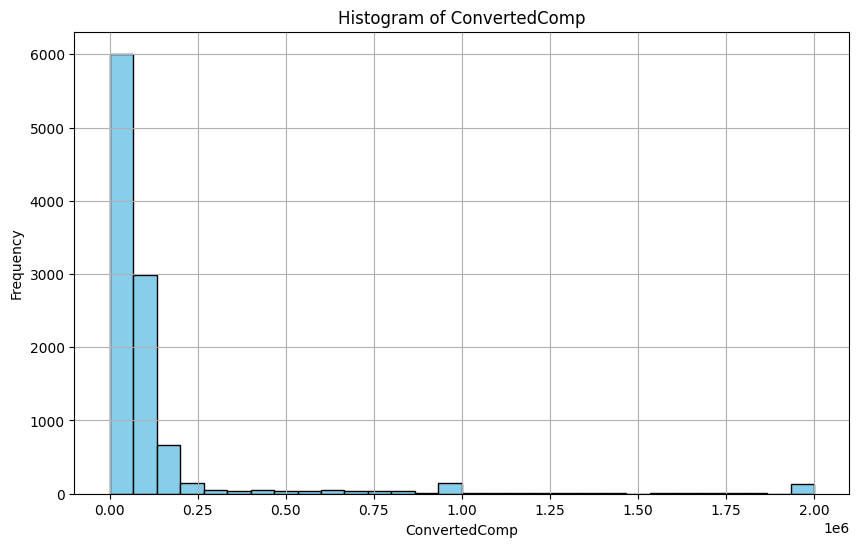

In [9]:
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT ConvertedComp FROM master", conn)

# Close the connection
conn.close()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



### Box Plots


Plot a box plot of `Age.`


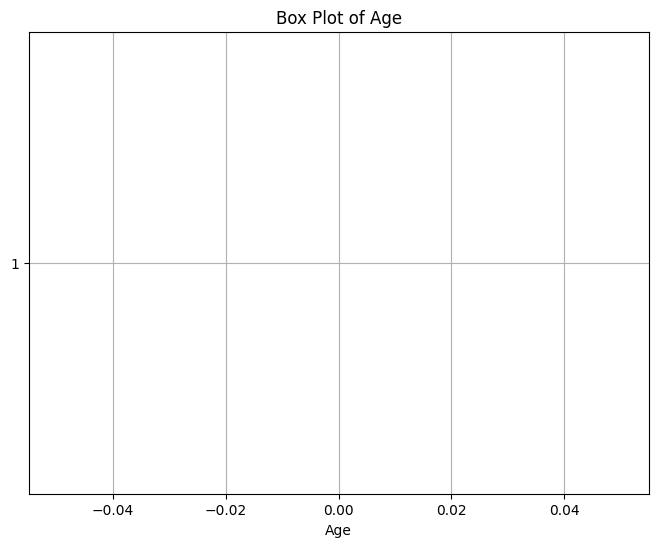

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT Age FROM master", conn)

# Close the connection
conn.close()

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


In [11]:
pip install seaborn

Outliers above Q3:
       Respondent                                         MainBranch Hobbyist  \
50            111                     I am a developer by profession      Yes   
139           306  I am not primarily a developer, but I write co...      Yes   
171           375                     I am a developer by profession      Yes   
178           392                     I am a developer by profession      Yes   
199           429                     I am a developer by profession      Yes   
...           ...                                                ...      ...   
11217       24357                     I am a developer by profession       No   
11263       24466                     I am a developer by profession      Yes   
11346       24664                     I am a developer by profession      Yes   
11400       24786                     I am a developer by profession      Yes   
11442       24889                     I am a developer by profession      Yes   

        

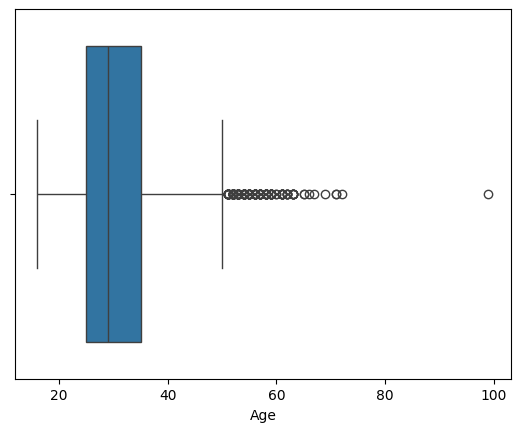

In [12]:
import seaborn as sns

# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Plot boxplot for Age column
sns.boxplot(x='Age', data=df)

# Calculate Q1 and Q3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Print outliers above Q3
outliers_above_Q3 = df[df['Age'] > upper_bound]
print("Outliers above Q3:")
print(outliers_above_Q3)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


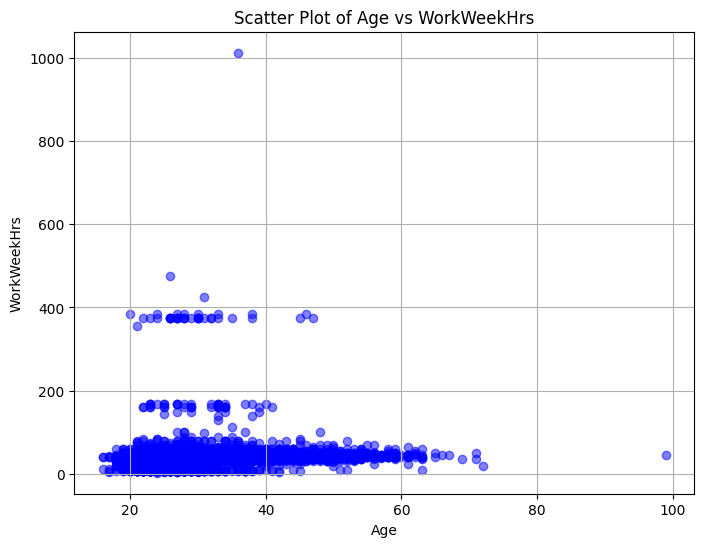

In [13]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT Age, WorkWeekHrs FROM master", conn)

# Close the connection
conn.close()

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()


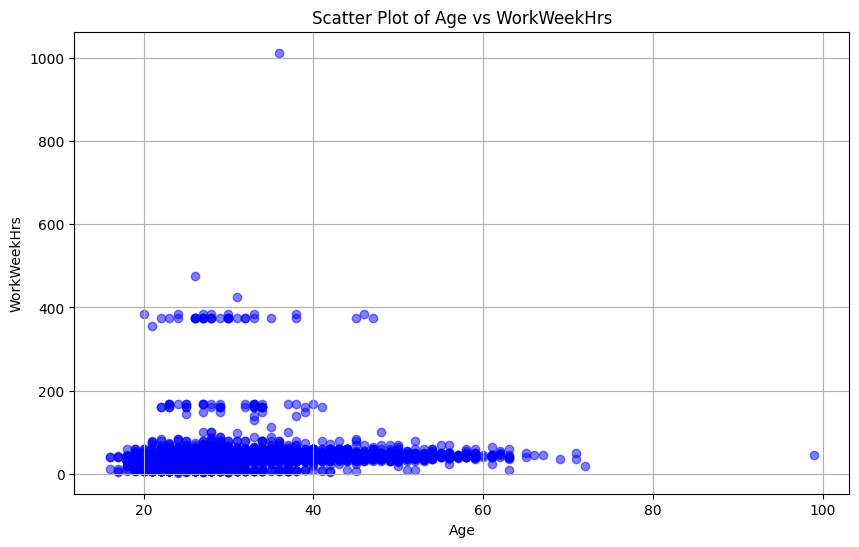

Pearson correlation coefficient between Age and WorkWeekHrs: 0.03688694959626343


In [14]:
import matplotlib.pyplot as plt

# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Plot scatter plot of Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()

# Calculate Pearson correlation coefficient
correlation = df['Age'].corr(df['WorkWeekHrs'])
print("Pearson correlation coefficient between Age and WorkWeekHrs:", correlation)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


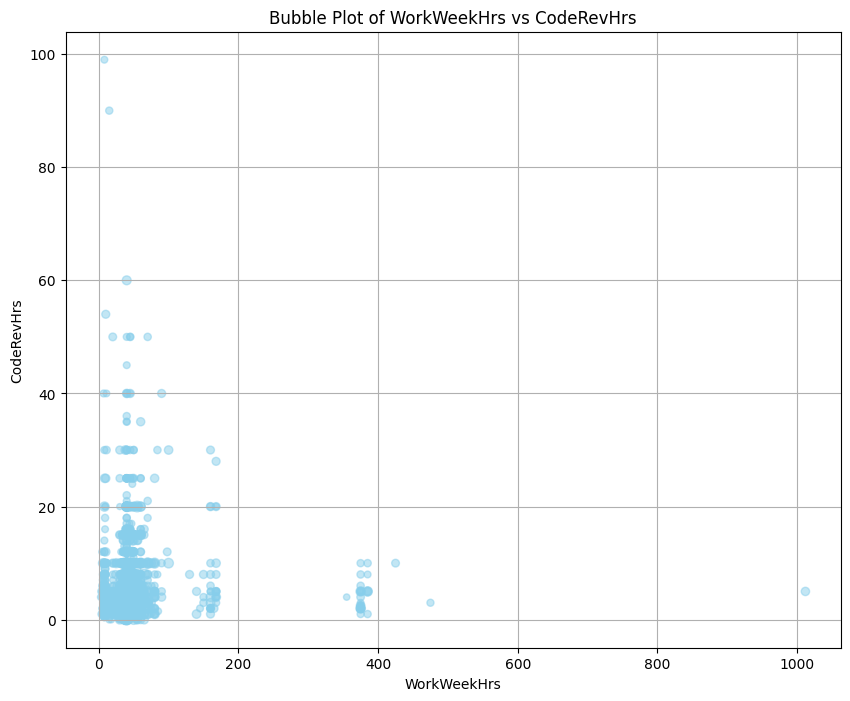

In [15]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT Age, WorkWeekHrs, CodeRevHrs FROM master", conn)

# Close the connection
conn.close()

# Define bubble size
bubble_size = df['Age']

# Plot bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5, color='skyblue')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


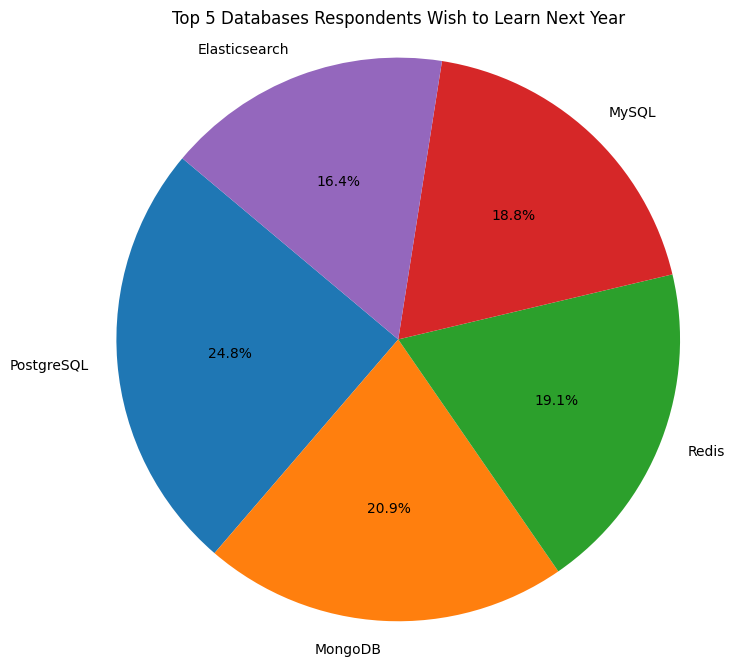

In [16]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear", conn)

# Close the connection
conn.close()

# Count occurrences of each database
database_counts = df['DatabaseDesireNextYear'].value_counts()

# Select top 5 databases
top_5_databases = database_counts.head()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [17]:
# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Count the occurrences of each value in the LanguageDesireNextYear column
language_counts = df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts()

# Identify the rank of Python
python_rank = language_counts.index.get_loc('Python') + 1

print("Rank of Python in the list of most popular languages respondents wish to learn next year:", python_rank)

Rank of Python in the list of most popular languages respondents wish to learn next year: 3


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


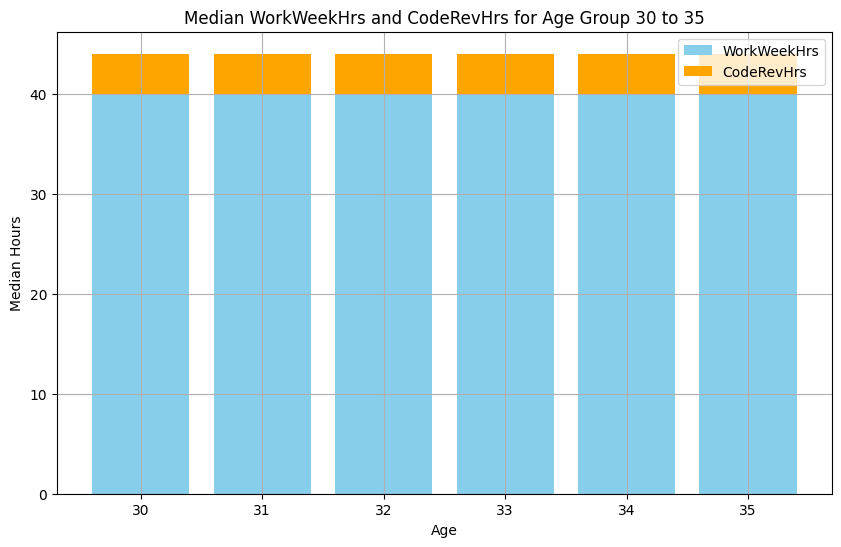

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query data for the age group 30 to 35
query = """
    SELECT Age, WorkWeekHrs, CodeRevHrs
    FROM master
    WHERE Age >= 30 AND Age <= 35
"""

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Group data by Age and calculate median WorkWeekHrs and CodeRevHrs
median_data = df.groupby('Age').median()

# Plot stacked chart
plt.figure(figsize=(10, 6))
plt.bar(median_data.index, median_data['WorkWeekHrs'], label='WorkWeekHrs', color='skyblue')
plt.bar(median_data.index, median_data['CodeRevHrs'], bottom=median_data['WorkWeekHrs'], label='CodeRevHrs', color='orange')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.legend()
plt.grid(True)
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [19]:
# Display the column names
print(df.columns)

Index(['Age', 'WorkWeekHrs', 'CodeRevHrs'], dtype='object')


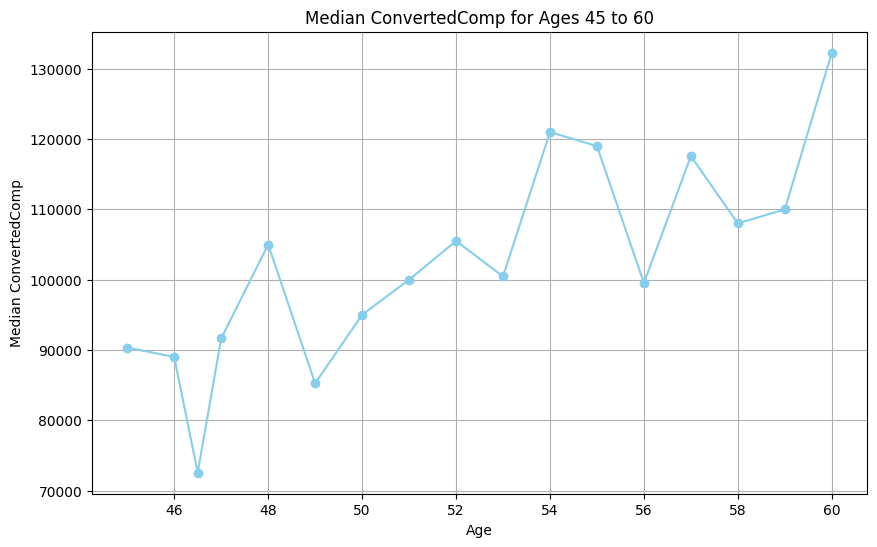

In [20]:
# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Filter data for ages from 45 to 60
filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate median ConvertedComp for each age
median_converted_comp = filtered_df.groupby('Age')['ConvertedComp'].median()

# Plot the median ConvertedComp against each age
plt.figure(figsize=(10, 6))
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o', color='skyblue', linestyle='-')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


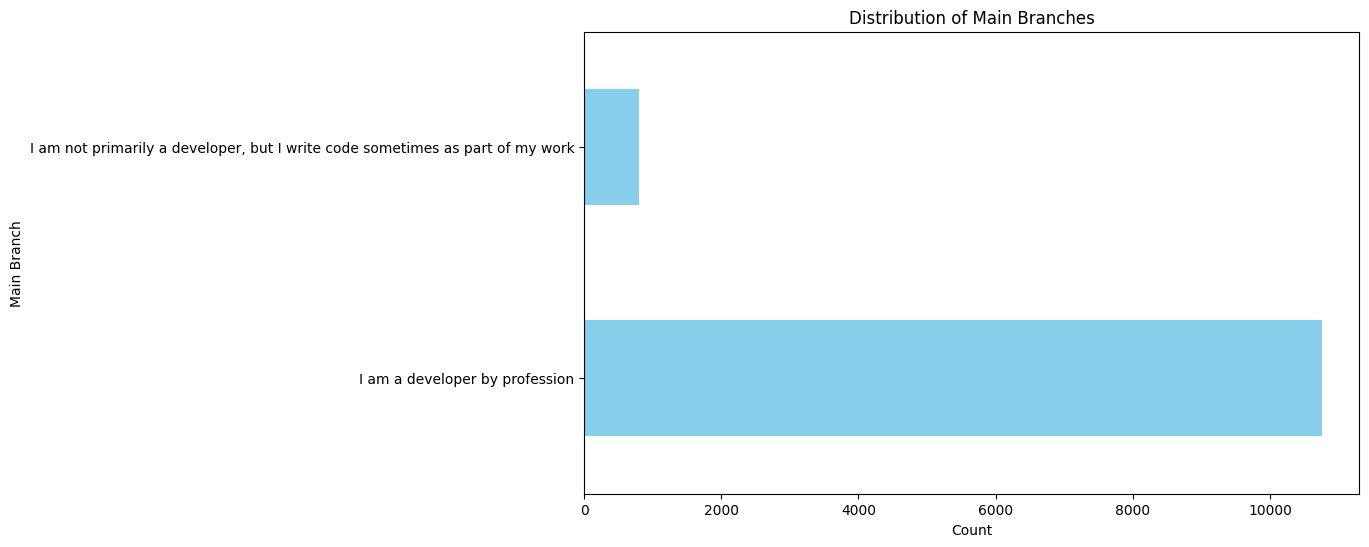

In [21]:
# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Count the occurrences of each value in the MainBranch column
main_branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Main Branches')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()


Close the database connection.


In [22]:
# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Count the occurrences of each value in the 'DevType' column
devtype_counts = df['DevType'].value_counts()

# Identify the category with the highest frequency
majority_devtype = devtype_counts.idxmax()

print("Majority of the survey responders are:", majority_devtype)


Majority of the survey responders are: Developer, full-stack


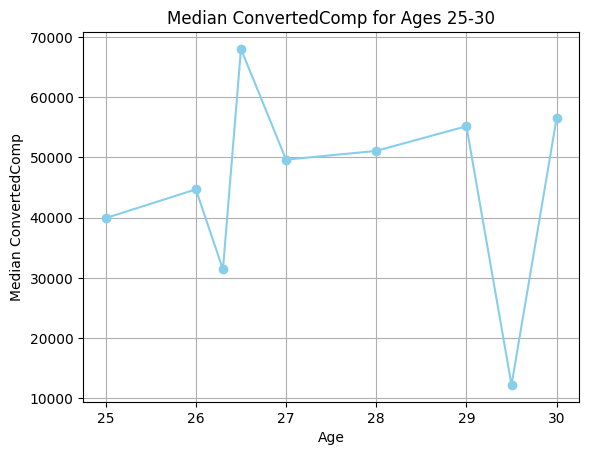

In [23]:
# Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

# Filter the DataFrame for the age group 25-30
age_group_25_30 = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Calculate the median ConvertedComp for each age within the age group 25-30
median_converted_comp = age_group_25_30.groupby('Age')['ConvertedComp'].median()

# Plot the line chart
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o', color='skyblue', linestyle='-')
plt.title('Median ConvertedComp for Ages 25-30')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()

In [24]:
conn.close()